# Prediction of house price

# import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Exploratory data analysis 

In [2]:
df=pd.read_csv('Real estate.csv',index_col='No')
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6


In [3]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


# exploring data

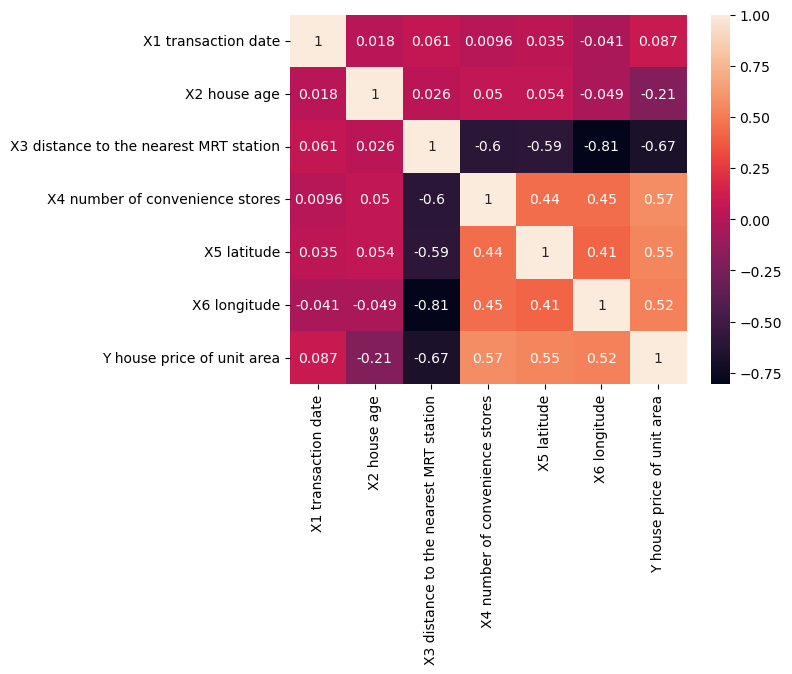

In [5]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
plt.show()

In [6]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

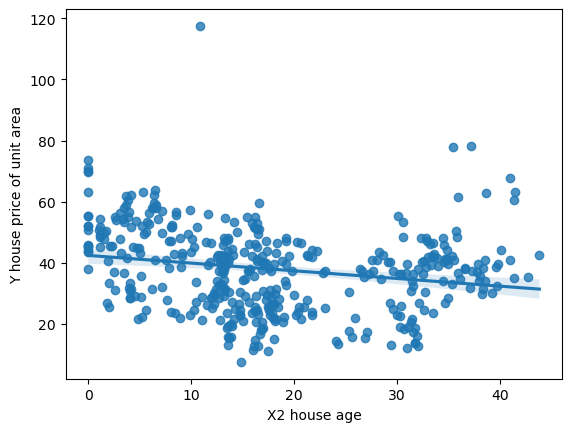

In [7]:
sns.regplot(data=df,x='X2 house age',y='Y house price of unit area')
plt.show()

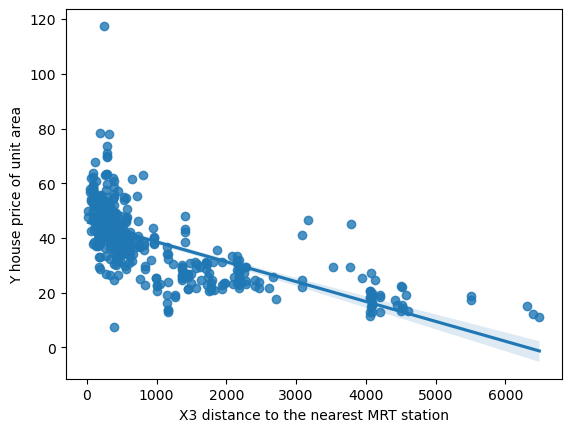

In [8]:
sns.regplot(data=df,x='X3 distance to the nearest MRT station',y='Y house price of unit area')
plt.show()

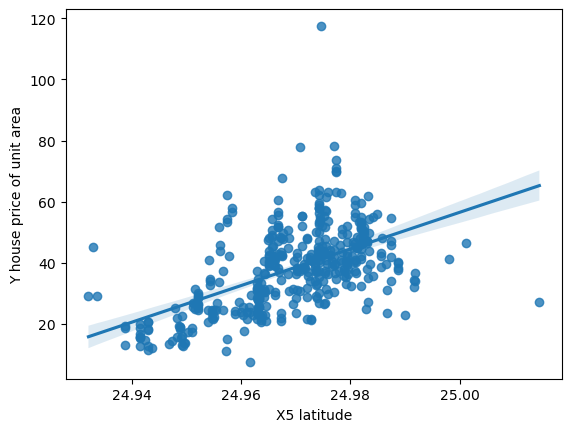

In [9]:
sns.regplot(data=df,x='X5 latitude',y='Y house price of unit area')
plt.show()

# model building & training

In [10]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [11]:
#Selecting Independent (Features) & Dependent(Target) variables
X = df.drop(columns=['Y house price of unit area'])
y=df.iloc[:,6]

In [12]:
X.shape

(414, 6)

In [13]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# 1)using statsmodels (statical approach)

In [14]:
import statsmodels.api as sm
X_stat=sm.add_constant(X)

In [15]:
reg_stat=sm.OLS(y,X_stat).fit()

In [16]:
reg_stat.params

const                                    -14437.100802
X1 transaction date                           5.146227
X2 house age                                 -0.269695
X3 distance to the nearest MRT station       -0.004487
X4 number of convenience stores               1.133277
X5 latitude                                 225.472976
X6 longitude                                -12.423601
dtype: float64

# 2)using scikit-learn(machine learning approach)

In [17]:
# Identify numeric columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns

In [18]:
numeric_columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype='object')

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns)  # Scale numeric column
    ])

In [20]:
# Create a pipeline with the preprocessor and the Linear Regression model
linear_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [21]:
# Define hyperparameters to tune
param_grid = {
    'regressor__normalize': [True, False], 
}

In [22]:
# Use mean squared error as the scoring metric for GridSearchCV
scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [23]:
# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(linear_regression_pipeline, param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype='object'))])),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__normalize': [True, False]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [24]:
# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Model Predication & Evaluation

In [25]:
# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

In [26]:
# Evaluate the best model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [27]:
#MAE
print(mean_absolute_error(y_test,y_pred))

6.057843422451063


In [28]:
#MSE
print(mean_squared_error(y_test,y_pred))

71.58131577256147


In [29]:
#r2_score
print(np.sqrt(r2_score(y_test,y_pred)))

0.7615652076202851


In [30]:
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'regressor__normalize': True}


The R2 score is good; it's about 76%. This indicates that approximately 76% of the variance in the target variable can be explained by our regression model. A higher R2 score suggests that our model performs well in capturing the underlying patterns in the data.